# **Proyecto - Entrega 2**

*   José Alejandro Cárdenas Ardila . . . .201211959
*   Camilo Andrés Torres Torres . . . . . . 201215238
*   Paola Andrea Urueña Pineda . . . . . . 202121068

## **1. Definición e Impacto del Problema**


Las noticias falsas brindan información que tiene como objetivo manipular a las personas con diferentes fines: terrorismo, elecciones políticas, publicidad, sátira, entre otros. Este tipo de noticias no solamente juegan un papel importante en desinformar a las personas, sino que también tienen un objetivo financiero por parte de quien las emite: de acuerdo con el medio de comunicación internacional BBC, plataformas de noticias falsas de Estados Unidos han llegado a recaudar hasta US$10.000 por una noticia. Así, la generación de clics por contenido compartido de información de alto impacto, aunque sea falsa, termina siendo lucrativa para los ciberdelincuentes.

Una de las principales consecuencias de las noticias falsas supone un golpe a la calidad del pensamiento crítico debido a la desinformación que imprimen en la opinión pública de los que las leen. Por lo anterior, y considerando que en las redes sociales la desinformación se extiende en segundos entre miles de personas, este proyecto busca determinar si es posible predecir la veracidad de un artículo publicado en redes sociales, para construir un sistema de detección de noticias falsas que ayude a los usuarios a filtrar noticias potencialmente engañosas.

Un enfoque para la predicción de noticias intencionadamente engañosas se basa en el análisis de noticias veraces y fraudulentas previamente clasificadas, es decir, un corpus anotado.  En nuestro caso, emplearemos los corpus habilitados para el ***Iberian Languages Evaluation Forum (IberLEF)**** en sus versiones 2020 y 2021 para la competencia de ***Detección de Noticias Falsas en Español***, a los cuales accedimos a través del siguiente repositorio de github:
https://github.com/jpposadas/FakeNewsCorpusSpanish.  

El corpus contiene 1542 artículos escritos en español (771 pares de publicaciones falsas y verdaderas) sobre diferentes eventos, que fueron recopilados entre enero a julio de 2018 y noviembre de 2020 hasta marzo de 2021.  Para recopilar la información fueron utilizadas diferentes fuentes de la web, principalmente de dos tipos; 1) sitios web de periódicos establecidos y empresas de medios, y 2) sitios web de verificación de datos y sitios web designados por diferentes periodistas como sitios que publican noticias falsas regularmente. La mayoría de los sitios de verificación de hechos revisados que se emplearon siguen las recomendaciones de la *Red Internacional de Verificación de Hechos (IFCN, por sus siglas en inglés)* que busca promover las buenas prácticas en la verificación de hechos. La categoría de 'noticias falsas' tambien incluye publicaciones en redes sociales, recuperadas principalmente de Facebook y WhatsApp. 

El significado de las columnas se describe a continuación:
*   Id : asigna un identificador a cada instancia.
*   Categoría : indica la categoría de la noticia (verdadera o falsa).
*   Tema : indica el tema relacionado con la noticia.
*   Fuente : indica el nombre de la fuente.
*   Titular : contiene el titular de la noticia. Se conoce que algunos artículos tienen "Titular" vacío intencionalmente, debido a que la fuente lo omitió
*   Texto : contiene el texto sin procesar de la noticia.
*   Enlace : contiene la URL de la fuente.

_______________________________________________
'* IberLEF es una campaña de evaluación comparativa de los Sistemas de Procesamiento del Lenguaje Natural en español y otras lenguas ibéricas. Su objetivo es alentar a la comunidad de investigación a organizar tareas competitivas de procesamiento, comprensión y generación de textos para definir nuevos desafíos de investigación y establecer nuevos resultados de vanguardia en esos idiomas.

Fuentes:
1.	Gómez-Adorno, H., Posadas-Durán, JP, Enguix, GB, & Capetillo, CP (2021). Resumen de FakeDeS en IberLEF 2021: Detección de noticias falsas en la tarea compartida en español. Procesamiento del Lenguaje Natural, 67, 223-231.
2.	Aragón, ME, Jarquín, H., Gómez, MMY, Escalante, HJ, Villaseñor-Pineda, L., Gómez-Adorno, H., ... & Posadas-Durán, JP (2020, septiembre). Resumen de mex-a3t en iberlef 2020: noticias falsas y análisis de agresividad en español mexicano. En Cuadernos del 2º Taller de la SEPLN sobre Foro de Evaluación de Lenguas Ibéricas (IberLEF), Málaga, España.
3.	Posadas-Durán, JP, Gómez-Adorno, H., Sidorov, G., & Escobar, JJM (2019). Detección de fake news en un nuevo corpus para lengua española. Revista de sistemas inteligentes y borrosos, 36(5), 4869-4876.

## **2. Datos y primer análisis exploratorio**

Por la documentación se conoce que el dataset ya había pasado por un proceso previo de normalización que eliminó elementos comunes en la estructura de las noticias y se pueden utilizar como marcadores. Dichos elementos fueron etiquetados de la siguiente forma:
1.   Los números que representan cantidades, horarios o precios fueron etiquetados usando NUMBER;
2.   Las direcciones de correo electrónico de los autores o editores se etiquetaron usando EMAIL;
3.   Las URL de referencias se etiquetaron usando URL;
4.   Los números de teléfono fueron etiquetados usando PHONE;
5.   Los símbolos del dólar y el euro fueron etiquetados DOL y EUR
respectivamente.

### **Feature Engineering**

Existen diferentes maneras de realizar el análisis de los textos. Dado que la fuente de información corresponde únicamente del texto del artículo (incluido el título) y la url. Adicionalmente, para un pequeño conjunto de la información, contamos con la etiqueta. Por este motivo, es un paso crucial definir correctamente qué características se van a extraer del texto.

Primero construiremos características, sin conocimiento previo, que consideramos pueden llegar a ser valiosas para la identificación de noticias falsas, como de conteo de caracteres o palabras, entre otras técnicas simples.

Posteriormente, como resultado de una investigación sobre el estado del arte y sobre las mejores técnicas disponibles en la literatura para la construcción de características de análisis de lenguaje natural, procederemos a experimentar con características mucho más robustas, con el fin de realizar una comparación entre las diferentes técnicas probadas.

El objetivo es lograr discernir entre las diferentes técnicas analizadas, y qué combinación de procedimientos pueden generar los mejores resultados.

#### **A. Lectura de la base de datos.**

In [ ]:
%pip install unidecode
%pip install wordcloud
%pip install catboost
%pip install nltk==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 11.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 83 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 8.4 MB/s 
  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436398 sha256=7877335326c362ac73694f608590d71a9a797c26696c5a095bd3354a8295dd2a
  Stored in directory: /root/.cache/pip/wheels/13/b8/81/2349be11dd144dc7b68ab983b58cd2fae353cdc50bbdeb09d0
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import numpy as np
import pandas as pd
import collections
import unicodedata
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import string

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier

import nltk

nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize, bigrams, trigrams
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.data import load
from nltk.stem import SnowballStemmer

from string import punctuation

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from keras.preprocessing.text import Tokenizer

import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dev_data = pd.read_excel('drive/Shareddrives/Proyecto MINERIA/data/development.xlsx').reset_index(drop= True)
test_data = pd.read_excel('drive/Shareddrives/Proyecto MINERIA/data/test.xlsx').reset_index(drop= True)
train_data = pd.read_excel('drive/Shareddrives/Proyecto MINERIA/data/train.xlsx').reset_index(drop= True)
test_data.columns = dev_data.columns
train_data.columns = dev_data.columns

In [ ]:
data_ini = dev_data.append(test_data, ignore_index=True)\
               .append(train_data, ignore_index=True)
print("Estructura inicial: ",data_ini.shape)
data_ini.tail()

Estructura inicial:  (1543, 7)


,Id,Category,Topic,Source,Headline,Text,Link
1538,672,Fake,Entertainment,El Dizque,Madonna será la nueva imagen del Chocolate Abu...,Madonna será la nueva imagen del Chocolate Abu...,https://www.eldizque.com/madonna-sera-la-nueva...
1539,673,True,Entertainment,Radio Formula,"Filtran material íntimo de Zelina Vega, luchad...","Filtran material íntimo de Zelina Vega, luchad...",http://www.radioformula.com.mx/notas.asp?Idn=7...
1540,674,Fake,Entertainment,La Voz Popular,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,http://lavozpopular.com/cbs-planea-gran-herman...
1541,675,Fake,Entertainment,El Dizque,TV Azteca anuncia que cambiará su nombre por u...,TV Azteca anuncia que cambiará su nombre por u...,https://www.eldizque.com/tv-azteca-anuncia-que...
1542,676,Fake,Entertainment,La voz popular,MUERTE DE PETER EL ANGUILA POR SOBREDOSIS,MUERTE DE PETER EL ANGUILA POR SOBREDOSIS\nPet...,http://lavozpopular.com/muerte-peter-el-anguil...


Dado que unimos los distintos dataset de las dos competencias, para crear nuestra propia partición de train y test, eliminamos la columna ID y validamos si existen duplicados en toda la base.

In [ ]:
data_ini.drop(['Id'], axis=1, inplace=True)
data_ini = data_ini.drop_duplicates(keep='first')

print("Estructura sin duplicados: ",data_ini.shape)
print('')
print('Cantidad de datos nulos:')
print(data_ini.isnull().sum())

Estructura sin duplicados:  (1542, 6)

Cantidad de datos nulos:
Category     0
Topic        0
Source       7
Headline    72
Text         0
Link         3
dtype: int64


Evidenciamos que existía una publicación duplicada en la base.  Adicionalmente, encontramos que existen 7 publicaciones sin la fuente informada y 3 no relacionan el link de donde proviene la información; por lo que decidimos eliminar dichas publicaciones.

Referente a las 72 publicaciones que no tienen un título informado, ya conocíamos con antelación que esta situación se podía presentar, porque la fuente no incluye un título, por lo que no se considerar errores de data, y se mantienen las publicaciones dentro del análisis.

In [ ]:
nulos = data_ini.index[(data_ini['Source'].isnull()==True) | (data_ini['Link'].isnull()==True)].tolist()
nulos

data = data_ini.drop(data_ini.index[nulos]).reset_index(drop=True)
data.shape

(1532, 6)

Con esta base, podemos generar unos descriptivos iniciales asociados al tema, la fuente y la clase.

In [ ]:
mirar = ['Category','Topic','Source']

for col in mirar:
  print("{}: {} \n {} \n".format(col, len(data[col].unique()), data[col].unique()))

Category: 2 
 ['Fake' 'True'] 

Topic: 16 
 ['Education' 'Society' 'Science' 'Security' 'Health' 'Economy' 'Sport'
 'Politics' 'Entertainment' 'Covid-19' 'Política' 'Sociedad'
 'Internacional' 'Ciencia' 'Deporte' 'Ambiental'] 

Source: 346 
 ['El Ruinaversal' 'Heraldo' 'abc' 'El país' 'EL UNIVERSAL' 'Hay noticia'
 'El Dizque' 'El Financiero' 'HUFFPOST' 'El Mañana Global' 'Censura 0'
 'Aristegui noticias' 'El Universal' 'MVS noticias' 'BBC News' 'Milenio'
 'SDPNoticias' 'La voz popular' 'Forbes' 'El Mundo' 'Actualidad RT'
 'Proceso' 'Diario Cambio' 'Retroceso' 'La Vanguardia'
 'ARGUMENTO POLÍTICO' 'La verdad.es' 'El Buen Tono' 'CNN español'
 'CNN en español' 'News Week español' 'El País' 'Muy Interesante'
 'ABC EL RECREO' 'BBC' 'Excelsior' 'La red 21' 'Rey Misterios'
 'Nación Unida' 'La Prensa' 'El Pais' 'Novedades Quitana Roo' 'NEWSner'
 'Grandes Medios' 'Alerta digital' 'Lo que calla la TV'
 'Argumento Político' 'Lamula' 'Info bae' 'La Jornada' 'El economista'
 'Voz del Sur' 'mvs noti

Vemos que:

 

*   **Category** nuestra variable de interés, solo tiene las clases *Fake y True*.
*   A pesar que **Topic** solo registra 16 datos únicos, evidenciamos que algunos temas se encuentran en ingles y otros en español, por lo que es necesario realizar una homologación para poder obtener un conteo único de temas.
*   En cuanto a las **fuentes de los datos**, vemos que se relacionan 346 datos únicos, lo que nos arrojaría un promedio de 4.4 artículos por fuente.  Sin embargo, se evidencia que por temas como mayusculas, espacios, stopwords, algunas fuentes se están contando varias veces; por lo que en este caso también sería necesario un proceso de estandarización para obtener un resultado mas adecuado.

Inicialmente realizaremos la estandarización del Topic, ya que las fuentes de datos requieren un trabajo más detallado.  En un siguiente paso, deberemos estandarizar la fuente, para ver si esta tiene alguna influencia en el hecho de que la publicación sea falsa o verídica; posiblemente podemos obtener una fuente mas estandarizada a partir de la url.

In [ ]:
# Diccionario y limpieza de la columna 'Topic'
Temas = {'Education': 'Educacion',
         'Society': 'Sociedad',
         'Science':'Ciencia',
         'Security': 'Seguridad',
         'Health': 'Salud',
         'Economy': 'Economia',
         'Sport': 'Deportes',
         'Politics': 'Política',
         'Entertainment': 'Entretenimiento'}

def limpiar_topic(topic):
    if topic in Temas.keys():
        return Temas[topic]
    else:
        return topic  

data['Topic'] = [limpiar_topic(x) for x in data['Topic'].astype(str)]
print("{}: {} \n {} \n".format('Topic', len(data['Topic'].unique()), data['Topic'].unique()))

# Estandarización de la columna 'Source' - Paso posterior
data['Source1'] = [re.findall(':\/\/www.([\w\-\.]+)',x) for x in data['Link'].astype(str)]
data['Source2'] = [re.findall('://([\w\-\.]+)',x) for x in data['Link'].astype(str)]

def merge_sources(row):
  source = row['Source1'] or row['Source2']
  if source:
    return source[0].split('.')[0]
  return 'None'

data['Source'] = data.apply(merge_sources, axis=1)

data.drop(['Source1', 'Source2'], axis=1, inplace=True)

print("{}: {} \n {} \n".format('Source', len(data['Source'].unique()), data['Source'].unique()))

# Identificación del Protocolo
data['Protocolo'] = [re.findall('(\w+)://',x) for x in data['Link'].astype(str)]
data['Protocolo'] = data['Protocolo'].apply(lambda p: p[0] if p else 'None')
print("{}: {} \n {} \n".format('Protocolo', len(data['Protocolo'].unique()), data['Protocolo'].unique()))

Topic: 13 
 ['Educacion' 'Sociedad' 'Ciencia' 'Seguridad' 'Salud' 'Economia'
 'Deportes' 'Política' 'Entretenimiento' 'Covid-19' 'Internacional'
 'Deporte' 'Ambiental'] 

Source: 301 
 ['elruinaversal' 'heraldo' 'abc' 'elpais' 'eluniversal' 'haynoticia'
 'eldizque' 'elfinanciero' 'huffingtonpost' 'elmanana' 'censura0'
 'aristeguinoticias' 'mvsnoticias' 'bbc' 'milenio' 'sdpnoticias'
 'lavozpopular' 'forbes' 'elmundo' 'actualidad' 'proceso' 'diariocambio'
 'retroceso' 'lavanguardia' 'argumentopolitico' 'laverdad' 'elbuentono'
 'cnnespanol' 'newsweekespanol' 'muyinteresante' 'excelsior' 'lr21'
 'reymisterios' 'nacionunida' 'la-prensa' 'sipse' 'es' 'grandesmedios'
 'alertadigital' 'locallalatv' 'redaccion' 'infobae' 'jornada'
 'eleconomista' 'vozdelsur' 'archivo' 'laopinion' 'Deporte' 'mediotiempo'
 'aztecaDeporte' 'modonoticia' 'espn' 'criteriouniversal' 'Política'
 'mediterraneodigital' 'sinembargo' 'expansion' 'radioformula'
 'inciclopedia' 'textonoticias' 'elheraldo' '' 'cubadebate' 'p

Vemos que después del ejercicio, quedamos con 13 Temas alrededor de los cuales giran nuestras publicaciones.

A pesar del ejercicio para estandarizar la fuente de información, terminamos con 300 fuentes (una disminución de apenas 46 fuentes, 13%), lo que podría indicar que la fuente de la información en realidad no es una característica diciente por si sola. Lo que podremos hacer con esto en pasos futuros, es verificar si la fuente se encuentra catalogada como confiable en las páginas que existen para ello.

##### **Distribuciones**

Ahora bien, después de realizar esta limpieza, procederemos a realizar un análisis de las frecuencias los datos con los que se cuentan. Se comienza por realizar un análisis del balance de los datos.

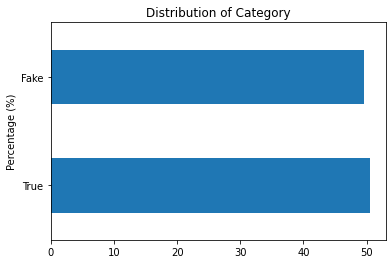

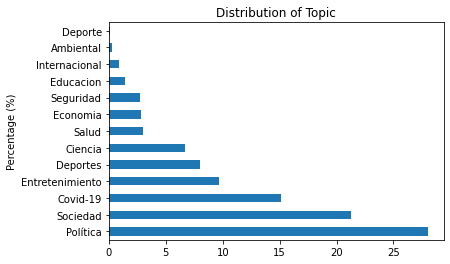

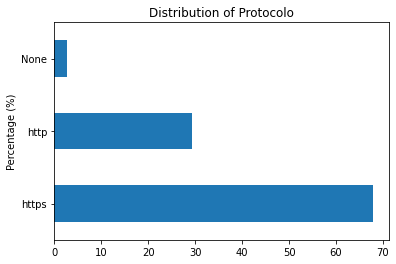

In [ ]:
mirar = ['Category','Topic','Protocolo']

for i, var in enumerate(mirar):
  plot = (100 * data[var].value_counts()/len(data[var])).sort_values(ascending = False).plot(kind='barh')
  title_string = "Distribution of "+ var
  plt.ylabel('Percentage (%)')
  plt.title(title_string)
  plt.show()

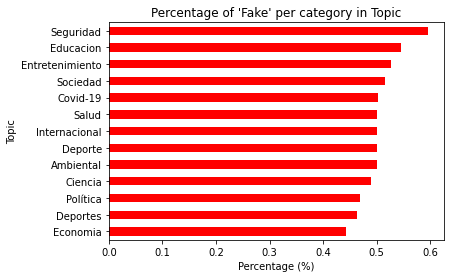

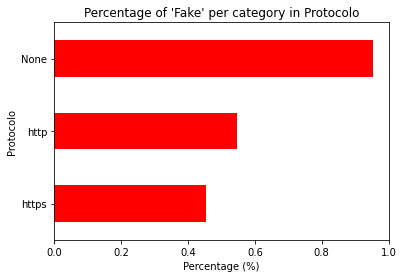

In [ ]:
mirar2 = mirar.copy()
mirar2.remove('Category')

for i, var in enumerate(mirar2):
    plot = pd.crosstab(index=data['Category'], columns=data[var], normalize = "columns").iloc[0].sort_values(ascending = True).plot(kind='barh', color='red')
    title_string = "Percentage of 'Fake' per category in "+ var
    plt.xlabel('Percentage (%)')
    plt.title(title_string)
    plt.show()

*   Respecto de la variable de interés, como ya lo sabíamos por la documentación, en el total la base se encuentra deliberadamente balanceada, aún cuando al revisar la participación de la clase 'Fake' por tema, encontramos que los temas menos balanceados son 'Economía', 'Deportes' y 'Política'.  En todos los casos, la participación de las noticias falsas es superior al 40%, por lo que concluimos que no habrán problemas en este aspecto al momento de realizar el modelo predictivo que se quiere.

*   También se realiza un análisis de frecuencia de los tópicos existentes y se puede ver que los tópicos están igualmente distribuidos tanto para las noticias falsas como para las reales. Encontramos que 'Política', 'Sociedad' y 'Covid-19' son los tres temas con participación superior al 10% en el total de publicaciones, y en conjunto agrupan el 64% de los artículos en nuestra base de datos.

*   Respecto del protocolo que tiene la columna *Link*, el proceso de extracción nos permitió identificar: por un lado, que menos del 5% de las publicaciones no tienen informado un enlace adecuado (enlace web); por el otro, que los enlaces con protocolo no seguro *http* tienen mayor participación de publicaciones clasificadas como *fake*.

In [ ]:
data_fin = data.copy()

#### **B. Preprocesamiento**

##### **Tokenización**

Mediante este proceso, dividimos el texto dado (Headline o Text) en palabras.  Sabemos que en análisis de texto diferencias en el acento, mayúsculas y minúsculas, entre otros, pueden llevar a que una misma palabra se cuente como palabras diferentes; por esto, primero normalizamos Headline y Text. 

En este proceso de normalización, estamos removiendo marcas de puntuación, acentos y llevando todo el texto a minúsculas.

In [ ]:
def strip_accents(s):
  if s is np.nan or s is None:
    return ''
  return ''.join(c for c in unicodedata.normalize('NFD', s)\
                 if unicodedata.category(c) != 'Mn')
   
def remove_non_alphanum(s):
  return ''.join(c for c in s if c.isalnum() or c.isspace())

def process_string(s):
  s = strip_accents(s)
  s = remove_non_alphanum(s)
  s = s.lower()
  return s

In [ ]:
data['Headline'] = data['Headline'].apply(process_string)
data['Text'] = data['Text'].apply(process_string)

In [ ]:
data.head()

,Category,Topic,Source,Headline,Text,Link,Protocolo
0,Fake,Educacion,elruinaversal,maestra de number anos que tuvo relaciones con...,maestra de number anos que tuvo relaciones con...,http://www.elruinaversal.com/2017/06/04/maestr...,http
1,True,Educacion,heraldo,oxford lanza sus propios examenes de certifica...,oxford lanza sus propios examenes de certifica...,https://www.heraldo.es/noticias/sociedad/2017/...,https
2,True,Educacion,abc,la rae estudia incluir machirulo en el diccion...,la rae estudia incluir machirulo en el diccion...,https://www.abc.es/cultura/abci-estudia-inclui...,https
3,True,Educacion,elpais,malala yousafzai anuncia que estudiara en oxford,malala yousafzai anuncia que estudiara en oxfo...,https://elpais.com/internacional/2017/08/17/ac...,https
4,Fake,Educacion,elruinaversal,nombran a ricardo arjona nuevo miembro de la r...,nombran a ricardo arjona nuevo miembro de la r...,http://www.elruinaversal.com/2017/06/25/nombra...,http


Teniendo en cuenta que los datos tienen etiquetas como number, email, url, teléfono y url, se realiza un análisis de la cantidad de estas etiquetas que tienen cada una de las categorías

In [ ]:
def draw_wordcloud(s):
  # Create and generate a word cloud image:
  wordcloud = WordCloud(width=1000, height=500).generate(s)

  # Display the generated image:
  plt.figure(figsize=(20,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
#  plt.show()

##### **Headlines**

A continuación se realiza un análisis exploratorio del contenido de los headlines de todas las noticias recolectadas. Se comienza por realizar un análisis de la nube de palabras más comunes dentro de todos los headlines.

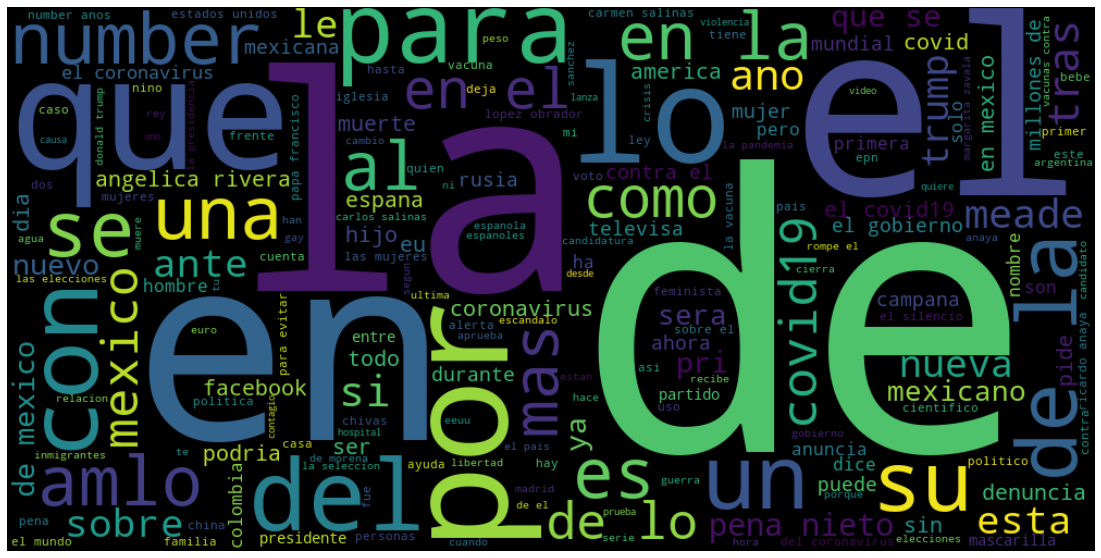

In [ ]:
all_headlines = [headline for headline in data['Headline'].values.tolist() \
                 if headline]
draw_wordcloud(' '.join(all_headlines))

Para un resultado más diciente, hacemos una eliminación de los stopwords en español y de las puntuaciones que se pueden ver a continuación:

In [ ]:
print('stopwords en español: ')
print(stopwords.words('spanish'))
print('puntuación: \n' + string.punctuation)

def get_words(values):
  filter = process_string(' '.join(stopwords.words('spanish'))).split(' ')
  concat_values = ' '.join(values)
  words = ' '.join([word for word in concat_values.split() \
                    if word not in string.punctuation and word not in filter \
                    and len(word) > 3])
  return words

stopwords en español: 
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos'

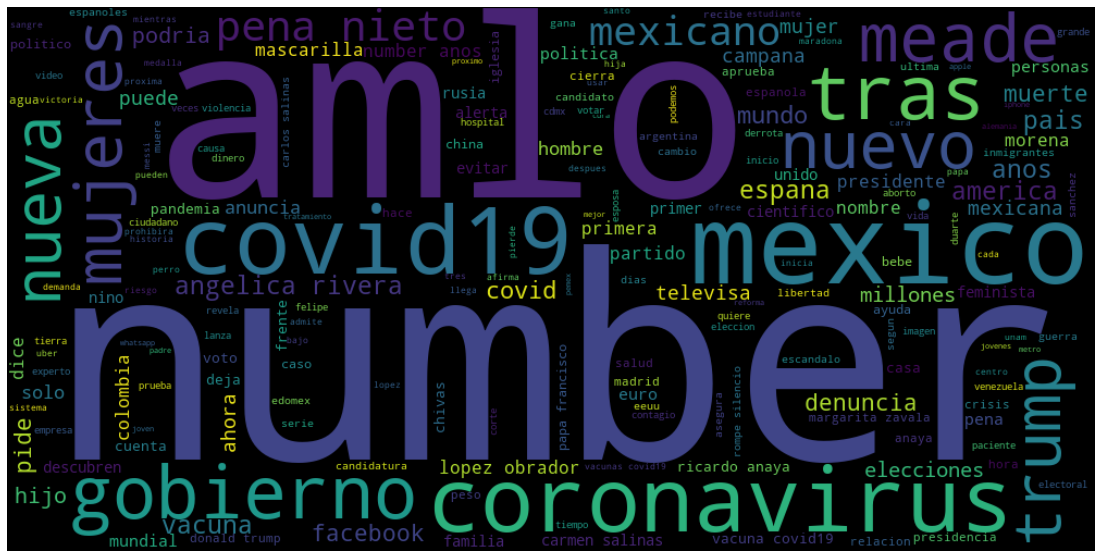

In [ ]:
draw_wordcloud(get_words(all_headlines))

Vemos que 'number', que es una palabra clave para cualquier número, es bastante atractivo para los headlines, así como también covid 19 y vacunas. Lo cual tiene sentido teniendo en cuenta que estos son hechos que son de coyuntura actual y que habrán muchas noticias ligadas al respecto.

Adicionalmente, podemos observar que el corpus está bastante enfocado en México (mexico, amlo, chapo, pena nieto), dado que mucha de la data disponible sobre noticias falsas se encuentra en este país.

Ahora, veremos cómo es la nube de palabras solamente para las noticias fake, para así poder realizar un primer análisis sobre cuáles son las palabras más usadas en estos headlines.

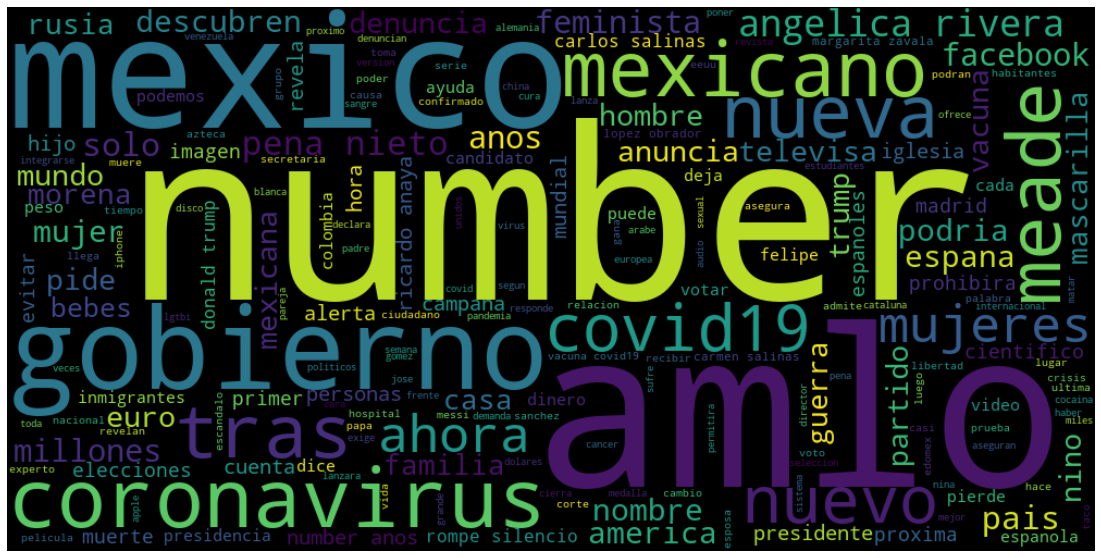

In [ ]:
fakes = data[data['Category'] == 'Fake']
fake_headlines = [headline for headline in fakes['Headline'].values.tolist() \
                  if headline]
draw_wordcloud(get_words(fake_headlines))

Se puede observar que, al igual que en todos los headlines, la palabra más destacada son los números que existen dentro de las noticias. 

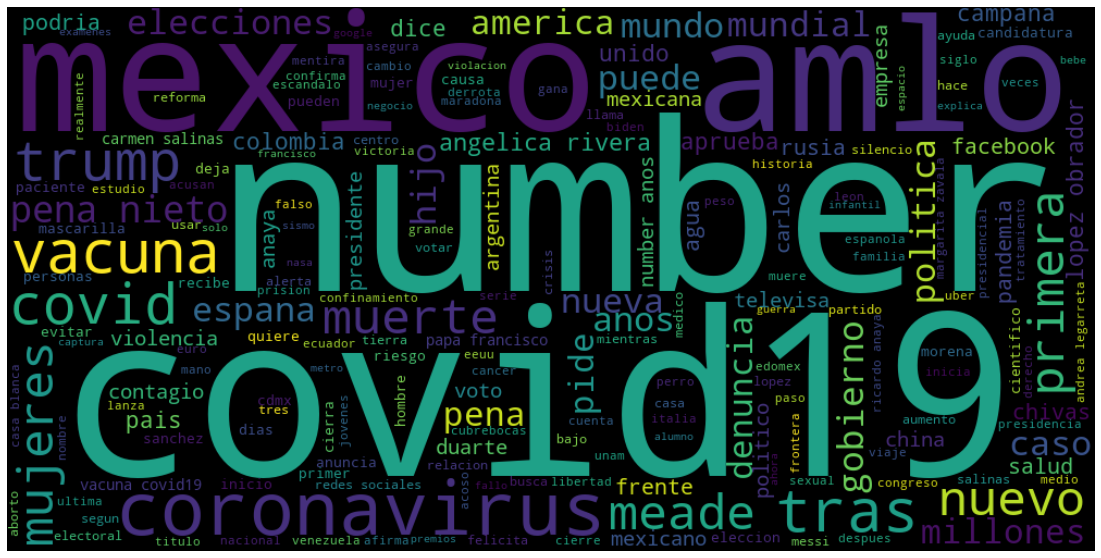

In [ ]:
trues = data[data['Category'] == 'True']
true_headlines = [headline for headline in trues['Headline'].values.tolist() \
                  if headline]
draw_wordcloud(get_words(true_headlines))

##### **Textos**

Se realiza el mismo análisis pero para el contenido de los textos de las noticias y se encuentran las siguientes nubes de palabras:

In [ ]:
all_texts = [text for text in data['Text'].values.tolist()]

Se obtiene la siguiente nube de palabras para los textos de las noticias falsas:

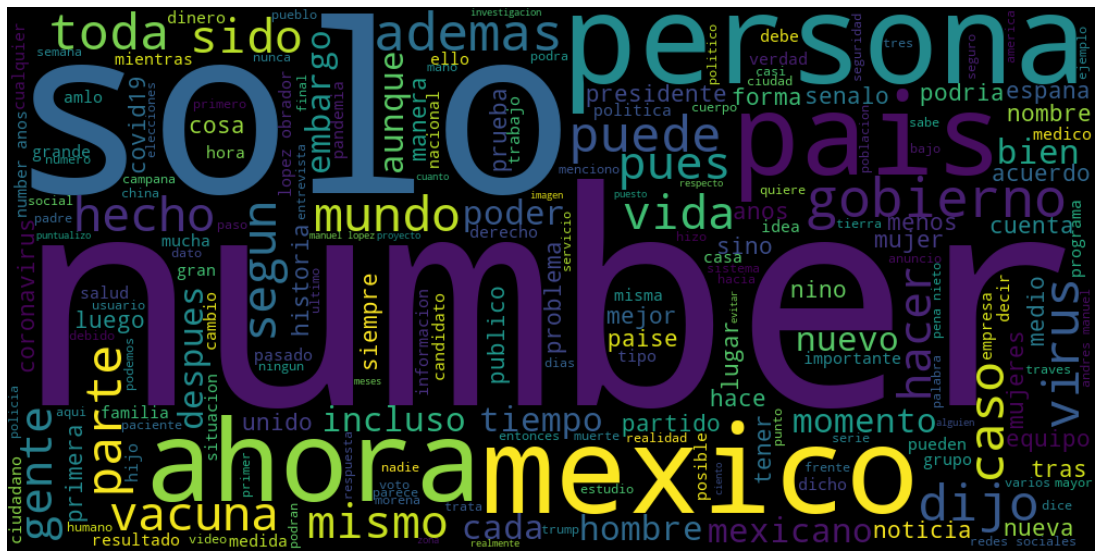

In [ ]:
fake_texts = [text for text in fakes['Text'].values.tolist() if text]
draw_wordcloud(get_words(fake_texts))

Asímismo, se obtiene la nube de palabras para las noticias verdaderas:

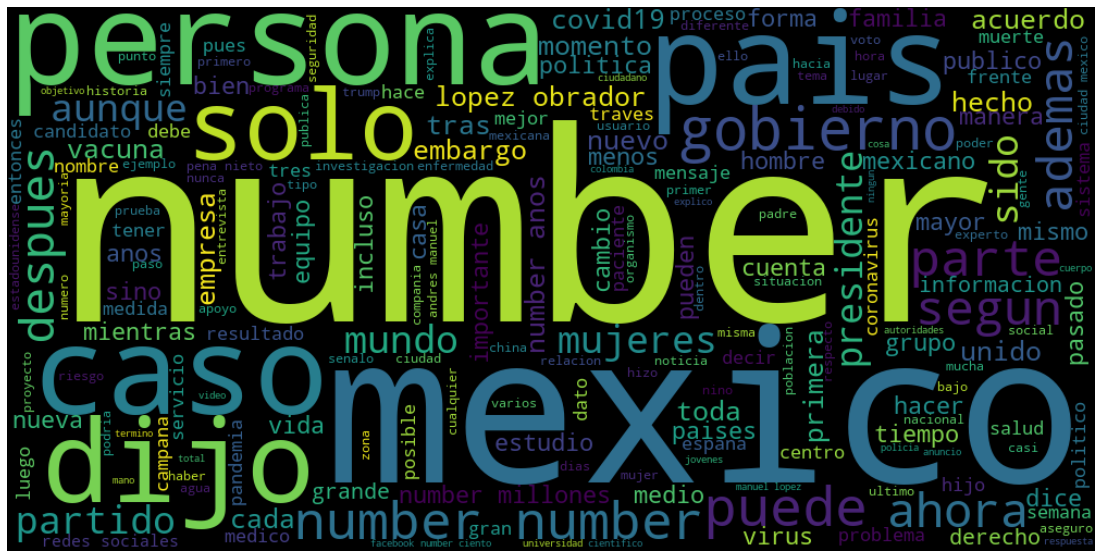

In [ ]:
true_texts = [text for text in trues['Text'].values.tolist() if text]
draw_wordcloud(get_words(true_texts))

Se puede observar que en las noticias falsas hay una mayor frecuencia de palbras como lo son virus, vacunas, gobierno entre otras que pueden causar más impacto al momento de querer ser compartidas, mientras que las noticias reales, no tienen estas palabras tan frecuentemente, pues se ven más pequeñas dentro de la nube. 

Es importante cuantificar lo visto en la nube de palabras, por lo que se realizan gráficas para observar la frecuencia de palabras en los headlines y los textos:

In [ ]:
def get_ordered_word_dict(s):
  word_count = {}
  words = s.split()

  for word in words:
    if word in word_count:
      word_count[word] += 1
    else:
      word_count[word] = 1

  word_count = sorted(word_count.items(),
                      key=lambda kv: kv[1], reverse=True)
  return collections.OrderedDict(word_count)

In [ ]:
def plot_word_count(ordered_dict, top):
  items = list(ordered_dict.items())[:top]
  plt.figure(figsize=(30,5))
  sns.barplot(x=list(map(lambda item: item[0], items)),
              y = list(map(lambda item: item[1], items)))

In [ ]:
headlines_word_count = get_ordered_word_dict(get_words(all_headlines))

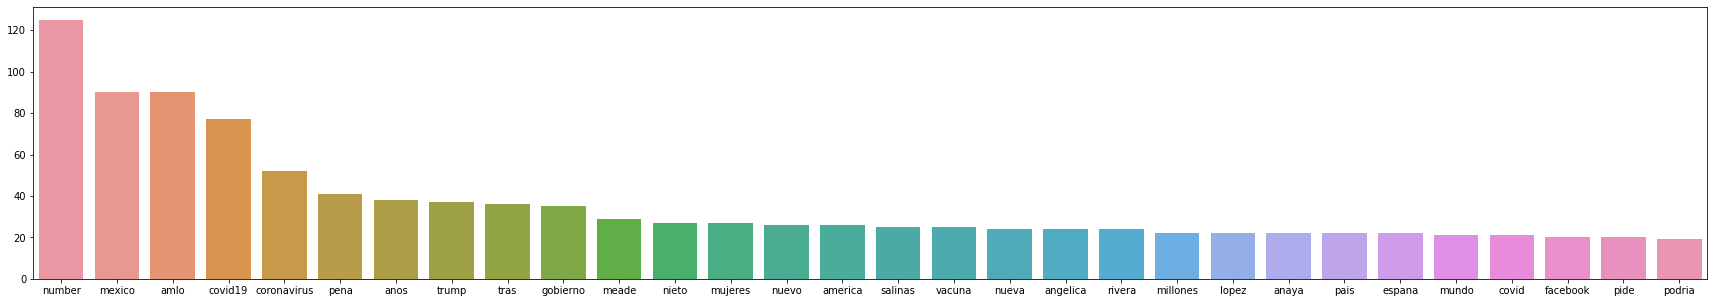

In [ ]:
plot_word_count(headlines_word_count, 30)

In [ ]:
text_word_count = get_ordered_word_dict(get_words(all_texts))

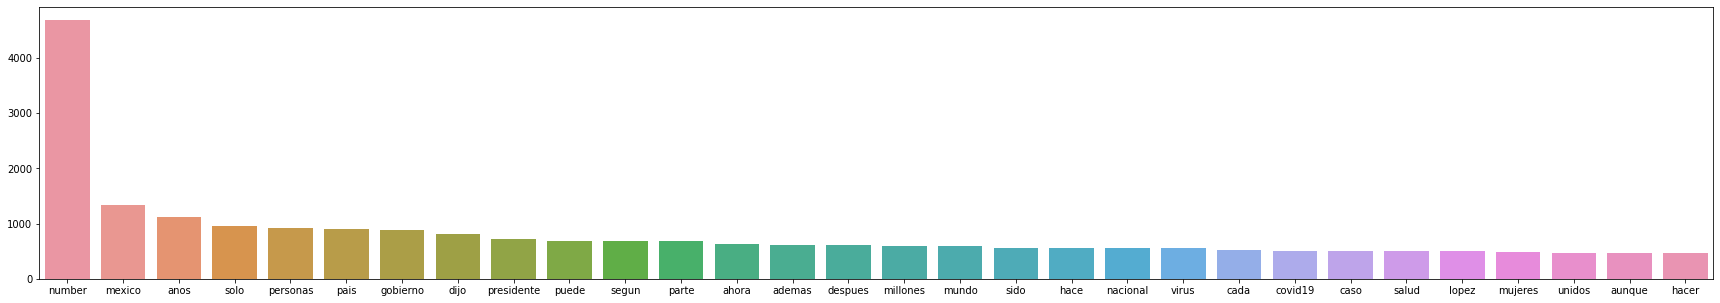

In [ ]:
plot_word_count(text_word_count, 30)

##### **Bag of words**

In [ ]:
headline_tokenizer = Tokenizer()
headline_words = get_words(all_headlines).split()

headline_tokenizer.fit_on_texts(headline_words)
print(f'Vocabulary Size: {len(list(headline_tokenizer.word_index.keys()))}')

Vocabulary Size: 4590


In [ ]:
headline_vectors = headline_tokenizer.texts_to_matrix(data['Headline'].values.tolist(),
                                                      mode='count')
headline_vectors

array([[0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [ ]:
headline_vectors.shape

(1532, 4591)

Con la bolsa de palabras podemos tener una representación numérica, de los headlines. Teniendo en cuenta el vocabulario (ordenado en número de ocurrencias).

In [ ]:
texts_tokenizer = Tokenizer()
texts_words = get_words(all_texts).split()

texts_tokenizer.fit_on_texts(texts_words)
print(f'Vocabulary Size: {len(list(texts_tokenizer.word_index.keys()))}')

Vocabulary Size: 40929


In [ ]:
texts_vectors = texts_tokenizer.texts_to_matrix(data['Text'].values.tolist(),
                                                mode='count')
texts_vectors

array([[0., 7., 1., ..., 0., 0., 0.],
       [0., 6., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [ ]:
texts_vectors.shape

(1532, 40930)

#####**N-gramas**

Adicionalmente, es importante observar cuáles son los n-gramas que ocurren en los textos. Acá se quiere observar la ocurrencia de n palabras dentro de los textos para así poder intentar observar una relación entre ellas. Para ello se contruye la función que se encuentra a continuación:

In [ ]:
def build_ngram(series, n=2, top = 10):
  all_str = get_words(series)
  return (pd.Series(ngrams(all_str.split(), n)).value_counts())[:top]

*Bigramas*

Lo primero que se quiere observar es cuáles conjuntos de dos palabras son los que más se observan tanto en el headline como en el texto del artículo. Se encuentra que en su mayoría son nombres de personas, sin embargo, también salen bigramas como el de vacuna covid 19.

In [ ]:
build_ngram(data['Headline'],n=2,top=10)

(pena, nieto)          27
(angelica, rivera)     24
(lopez, obrador)       15
(number, anos)         15
(carmen, salinas)      13
(vacuna, covid19)      12
(ricardo, anaya)       12
(papa, francisco)      11
(margarita, zavala)    10
(donald, trump)        10
dtype: int64

In [ ]:
build_ngram(data['Text'],n=2,top=10)

(number, number)      443
(lopez, obrador)      389
(number, anos)        361
(number, millones)    283
(pena, nieto)         232
(redes, sociales)     229
(andres, manuel)      197
(manuel, lopez)       177
(ciudad, mexico)      168
(enrique, pena)       123
dtype: int64

*Trigramas*

Al igual que con los pares de palabras, se realiza el mismo ejercicio para 3 pares de palabras. En este caso ya casi no se encuentran nombres si no otros conjuntos de frases interesantes como tercera guerra mundial o mundial rusia, lo cual hace sentido con el panorama mundial que se vive actualmente.

In [ ]:
build_ngram(data['Headline'],n=3,top=10)

(carlos, salinas, gortari)      4
(enrique, pena, nieto)          3
(angelica, rivera, hijas)       3
(mundial, rusia, number)        3
(tercera, guerra, mundial)      3
(number, millones, pesos)       3
(sistema, educativo, japon)     2
(copa, amor, pena)              2
(movistar, vodafone, orange)    2
(temporada, game, thrones)      2
dtype: int64

In [ ]:
build_ngram(data['Text'],n=3,top=10)

(manuel, lopez, obrador)          177
(andres, manuel, lopez)           170
(enrique, pena, nieto)            115
(jose, antonio, meade)             62
(organizacion, mundial, salud)     62
(number, millones, dolares)        54
(number, millones, pesos)          52
(number, number, anos)             46
(number, number, number)           44
(presidente, enrique, pena)        43
dtype: int64

##### **Número de etiquetas**

Se considera que el número de tags (number, URL, entre otros) que tiene cada texto y headline pueden generar alguna diferencia a la hora de determinar la veracidad de la publicación, por lo que se realizan los computos pertinentes.

In [ ]:
def get_number_of_tags(text,tag):
  return text.split().count(tag)

In [ ]:
data['tag_number_headline'] = data['Headline'].apply(lambda x: get_number_of_tags(x,'number'))
data['tag_number_text'] = data['Text'].apply(lambda x: get_number_of_tags(x,'number'))
data['tag_email_headline'] = data['Headline'].apply(lambda x: get_number_of_tags(x,'email'))
data['tag_email_text'] = data['Text'].apply(lambda x: get_number_of_tags(x,'email'))
data['tag_url_headline'] = data['Headline'].apply(lambda x: get_number_of_tags(x,'url'))
data['tag_url_text'] = data['Text'].apply(lambda x: get_number_of_tags(x,'url'))
data['tag_phone_headline'] = data['Headline'].apply(lambda x: get_number_of_tags(x,'phone'))
data['tag_phone_text'] = data['Text'].apply(lambda x: get_number_of_tags(x,'phone'))

In [ ]:
columns = ['Category','tag_number_headline','tag_number_text','tag_email_headline','tag_email_text',\
           'tag_url_headline','tag_url_text','tag_phone_headline','tag_phone_text']
data[columns].groupby(['Category']).mean()

,tag_number_headline,tag_number_text,tag_email_headline,tag_email_text,tag_url_headline,tag_url_text,tag_phone_headline,tag_phone_text
Category,,,,,,,,
Fake,0.085639,1.349144,0.0,0.005270,0.0,0.005270,0.000000,0.002635
True,0.077620,4.743855,0.0,0.007762,0.0,0.011643,0.001294,0.020699


En este análisis, se puede observar que, en promedio las noticias verdaderas otorgan más información de números, mails, url y teléfonos que las noticias falsas. Más específicamente se puede observar una gran diferencia entre los números que dan las noticias verdaderas que las falsas, haciendo que esta pueda ser una feature interesante al momento de hacer las predicciones.

## **3. Primera respuesta a la pregunta**


Este primer análisis ha sido de gran utilidad para entender de primera mano las distribuciones del dataset, sus variables principales y cómo se comportan. También ha sido de gran utilidad para la obtención de nuevos predictores que pueden estar relacionados con la variable de respuesta y serán de utilidad a la hora de implementar el modelo de clasificación esperado. 

Este análisis tiene limitaciones en cuanto a que hace falta el desarrollo de un componente semántico más profundo y de entidades reconocidas. También hay que tener en cuenta a la hora de evaluar estos textos algunos predictores que estén relacionados al estilo de escritura pues pensamos que esto podría ser de gran utilidad a la hora de hacer separaciones; así como el diseño de las páginas fuente, para lo que será necesario extraer estos features de los 'Links' ya que son características con las que no se cuenta actualmente. 

En cuanto a datos, según la literatura pasada acerca de este tipos de modelos de predicción inferimos que no necesitamos más data que la disponible pero sí un acercamiento mayor al problema para el desarrollo de nuevas features.  Hay que tener en cuenta que en estos modelos de natural language processing las features que se pueden extraer pueden ser tan específicas como se quiera usando incluso hasta los vectores obtenidos en bag of words y por esto es necesario hacer un esfuerzo mayor en la detección de la importancia de todas estas features para no sobreajustar el modelo y evitar caer en la maldición de la dimensionalidad.

Otra de las limitaciones y, de ser superado satisfactoriamente, potenciales que observamos, es que al tener artículos de diferentes países de habla hispana, es dificil incorporar en el análisis todos los regionalismos y acentos, por lo que las features que se encuentren pueden no resultar en un modelo tan generalizable.

## **4. Análisis de sentimiento**

In [ ]:
data_sentiment = data_fin.copy()
data_sentiment = data_sentiment.dropna()

In [ ]:
data_sentiment.head()

,Category,Topic,Source,Headline,Text,Link,Protocolo
0,Fake,Educacion,elruinaversal,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http://www.elruinaversal.com/2017/06/04/maestr...,http
1,True,Educacion,heraldo,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https://www.heraldo.es/noticias/sociedad/2017/...,https
2,True,Educacion,abc,La RAE estudia incluir «machirulo» en el Dicci...,La RAE estudia incluir «machirulo» en el Dicci...,https://www.abc.es/cultura/abci-estudia-inclui...,https
3,True,Educacion,elpais,Malala Yousafzai anuncia que estudiará en Oxford,Malala Yousafzai anuncia que estudiará en Oxfo...,https://elpais.com/internacional/2017/08/17/ac...,https
4,Fake,Educacion,elruinaversal,Nombran a Ricardo Arjona nuevo miembro de la R...,Nombran a Ricardo Arjona nuevo miembro de la R...,http://www.elruinaversal.com/2017/06/25/nombra...,http


In [ ]:
%pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.3 MB 29.5 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 65 kB 3.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=49db5a0493f731decd35519fe90de58c22db512be025ff0b95513fcb336dfc4d
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


#### **Traduccion de textos**

Las librerías de análisis de sentimiento están basadas en entrenamientos previos en inglés por lo que se dispone a realizar traducciones de los textos a inglés usando la API de google translate.

In [ ]:
from googletrans import Translator

In [ ]:
data_ini_prueba = data_sentiment.groupby('Category').apply(lambda x: x.sample(20)).reset_index(drop=True)


In [ ]:
translator = Translator()

In [ ]:
data_ini_prueba['Text_translated'] = data_ini_prueba['Text'].apply(lambda x: translator.translate(x,src='es').text)

####**Análisis de sentimiento usando textblob**

In [ ]:
%pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

In [ ]:
def get_average_sentiment(text):
    sentences = text.split('.')
    textblob_sentiment = []
    for s in sentences:
      res = TextBlob(s)
      a = res.sentiment.polarity
      b = res.sentiment.subjectivity
      textblob_sentiment.append([a,b])
    
    average_polarity = np.mean([item[0] for item in textblob_sentiment])
    average_subjectivity = np.mean([item[1] for item in textblob_sentiment])
    return average_polarity, average_subjectivity

In [ ]:
get_average_sentiment(data_ini_prueba['Text_translated'].loc[0])

(0.13581293706293704, 0.34419677544677546)

In [ ]:
data_ini_prueba['polaridad'], data_ini_prueba['subjetividad'] = zip(*data_ini_prueba['Text_translated'].map(get_average_sentiment))

In [ ]:
data_ini_prueba.head(2)

,Category,Topic,Source,Headline,Text,Link,Protocolo,Text_translated,polaridad,subjetividad
0,Fake,Política,mediterraneodigital,Ser gay o LGTBI sumará puntos para ser funcion...,El Tribunal Administrativo de Contratación Púb...,https://www.mediterraneodigital.com/espana/gal...,https,The Administrative Court of Public Procurement...,0.135813,0.344197
1,Fake,Deportes,eldizque,Revelada la condición médica del portero Agust...,Revelada la condición médica del portero Agust...,https://www.eldizque.com/revelada-la-condicion...,https,Revealed the medical condition of goalkeeper A...,0.062644,0.295589


In [ ]:
data_ini_prueba[['Category','polaridad','subjetividad']].groupby('Category').mean()

,polaridad,subjetividad
Category,,
Fake,0.105450,0.346755
True,0.045587,0.273407


In [ ]:
data_ini_prueba[['Category','polaridad','subjetividad']].groupby('Category').std()

,polaridad,subjetividad
Category,,
Fake,0.093864,0.071964
True,0.050390,0.104728


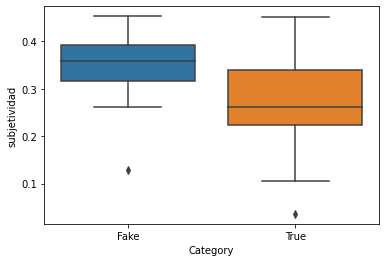

In [ ]:
sns.boxplot(x='Category',y='subjetividad',data=data_ini_prueba[['Category','subjetividad']])

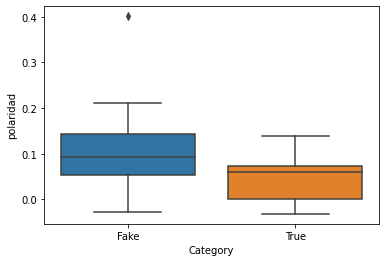

In [ ]:
sns.boxplot(x='Category',y='polaridad',data=data_ini_prueba[['Category','polaridad']])

## **5. Modelos de Predicción (Clasificación)**

#### **Predicción con Árboles (Ensambles)**

Primero se quiere ver cómo se comporta un algoritmo de clasificación utilizando características básicas de los textos, tales como número de stopwords, número de mayúsculas, caracteres especiales, entre otras, tanto para el título como para el headline. Para este dataset podemos utilizar el topic como parámetro, para el cual sabemos que dependiendo del topic la proporción de fake news cambia.

Nos interesa construir el modelo a partir de las características intrínsecas de los textos (headline, text), por lo tanto ni la fuente ni el link nos interesan por el momento como características a incorporar. Lo mismo puede decirse del topic, sin embargo, inicialmente se contará con este feature.

In [ ]:
data_fin.head()

,Category,Topic,Source,Headline,Text,Link,Protocolo
0,Fake,Educacion,elruinaversal,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http://www.elruinaversal.com/2017/06/04/maestr...,http
1,True,Educacion,heraldo,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https://www.heraldo.es/noticias/sociedad/2017/...,https
2,True,Educacion,abc,La RAE estudia incluir «machirulo» en el Dicci...,La RAE estudia incluir «machirulo» en el Dicci...,https://www.abc.es/cultura/abci-estudia-inclui...,https
3,True,Educacion,elpais,Malala Yousafzai anuncia que estudiará en Oxford,Malala Yousafzai anuncia que estudiará en Oxfo...,https://elpais.com/internacional/2017/08/17/ac...,https
4,Fake,Educacion,elruinaversal,Nombran a Ricardo Arjona nuevo miembro de la R...,Nombran a Ricardo Arjona nuevo miembro de la R...,http://www.elruinaversal.com/2017/06/25/nombra...,http


In [ ]:
data_arboles = data_fin.copy()
data_arboles = data_arboles.dropna()
data_arboles = data_arboles.drop(['Source', 'Link'], axis=1)
data_arboles.head()

,Category,Topic,Headline,Text,Protocolo
0,Fake,Educacion,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http
1,True,Educacion,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https
2,True,Educacion,La RAE estudia incluir «machirulo» en el Dicci...,La RAE estudia incluir «machirulo» en el Dicci...,https
3,True,Educacion,Malala Yousafzai anuncia que estudiará en Oxford,Malala Yousafzai anuncia que estudiará en Oxfo...,https
4,Fake,Educacion,Nombran a Ricardo Arjona nuevo miembro de la R...,Nombran a Ricardo Arjona nuevo miembro de la R...,http


In [ ]:
data_arboles['Eng_Headline'] = data_arboles['Headline'].apply(lambda x: translator.translate(x,src='es').text)
data_arboles['Eng_Text'] = data_arboles['Text'].apply(lambda x: translator.translate(x,src='es').text)

In [ ]:
data_arboles.head()

,Category,Topic,Headline,Text,Protocolo,Eng_Headline,Eng_Text
0,Fake,Educacion,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http,TEACHER OF *NUMBER* YEARS WHO HAD RELATIONSHIP...,TEACHER OF *NUMBER* YEARS WHO HAD RELATIONSHIP...
1,True,Educacion,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https,Oxford launches its own English level certific...,Oxford launches its own English level certific...
2,True,Educacion,La RAE estudia incluir «machirulo» en el Dicci...,La RAE estudia incluir «machirulo» en el Dicci...,https,"The RAE studies including ""machirulo"" in the D...","The RAE studies including ""machirulo"" in the D..."
3,True,Educacion,Malala Yousafzai anuncia que estudiará en Oxford,Malala Yousafzai anuncia que estudiará en Oxfo...,https,Malala Yousafzai announces that she will study...,Malala Yousafzai announces that she will study...
4,Fake,Educacion,Nombran a Ricardo Arjona nuevo miembro de la R...,Nombran a Ricardo Arjona nuevo miembro de la R...,http,Ricardo Arjona appointed new member of the Roy...,Ricardo Arjona appointed new member of the Roy...


In [ ]:
# Total Palabras
# % de Mayúsculas con respecto a la longitud del texto.
# % de veces que aparece NUMBER sobre el total de palabras del texto (Headline).
# # de veces que aparece NUMBER (Texto).
# # de caracteres especiales.
# % de stop-words con respecto al total de palabras.
# # de puntuaciones (text)
# % Palabras únicas respecto al total
# Frases
# Promedio longitud frase

# Las características anteriores tanto para haedline como para text.

In [ ]:
def get_proporcion_mayusculas(text):
  result = re.findall(r'[A-Z]+', text)
  return len(''.join(result)) / len(text)

def get_numero_number(text):
  return len(re.findall(r'number+', text.lower()))

def get_proporcion_number(text):
  result = get_numero_number(text)
  return result / len(text.split())

def get_non_alphanumeric_count(text):
  result = re.findall(r'[^a-zA-Z0-9 ]', text)
  return len(result)

def get_stopword_count(text):
  count = 0
  _split = text.lower().split()
  stop_words_set = set(stopwords.words('spanish'))
  for word in _split:
    if word in stop_words_set:
      count += 1
  return count / len(_split)

def get_sentences_count(text):
  return len(nltk.sent_tokenize(text))

def get_palabras_unicas(text):
  return len(set(text.lower().split()))

In [ ]:
data_arboles['headline_palabras'] = data_arboles['Headline'].apply(lambda x: len(x.split()))
data_arboles['headline_palabras_avg_len'] = data_arboles['Headline'].apply(lambda x: len(x) / len(x.split()))
data_arboles['headline_mayusculas'] = data_arboles['Headline'].apply(get_proporcion_mayusculas)
data_arboles['headline_numbers'] = data_arboles['Headline'].apply(get_proporcion_number)
data_arboles['headline_especiales'] = data_arboles['Headline'].apply(get_non_alphanumeric_count)
data_arboles['headline_stopwords'] = data_arboles['Headline'].apply(get_stopword_count)
data_arboles['headline_unicas'] = data_arboles['Headline'].apply(lambda x: get_palabras_unicas(x)/len(x.split()))

data_arboles.head()

,Category,Topic,Headline,Text,Protocolo,Eng_Headline,Eng_Text,headline_palabras,headline_palabras_avg_len,headline_mayusculas,headline_numbers,headline_especiales,headline_stopwords,headline_unicas
0,Fake,Educacion,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http,TEACHER OF *NUMBER* YEARS WHO HAD RELATIONSHIP...,TEACHER OF *NUMBER* YEARS WHO HAD RELATIONSHIP...,18,5.888889,0.773585,0.111111,7,0.444444,0.888889
1,True,Educacion,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https,Oxford launches its own English level certific...,Oxford launches its own English level certific...,11,6.272727,0.014493,0.000000,3,0.363636,0.818182
2,True,Educacion,La RAE estudia incluir «machirulo» en el Dicci...,La RAE estudia incluir «machirulo» en el Dicci...,https,"The RAE studies including ""machirulo"" in the D...","The RAE studies including ""machirulo"" in the D...",8,6.500000,0.096154,0.000000,2,0.375000,1.000000
3,True,Educacion,Malala Yousafzai anuncia que estudiará en Oxford,Malala Yousafzai anuncia que estudiará en Oxfo...,https,Malala Yousafzai announces that she will study...,Malala Yousafzai announces that she will study...,7,6.857143,0.062500,0.000000,1,0.285714,1.000000
4,Fake,Educacion,Nombran a Ricardo Arjona nuevo miembro de la R...,Nombran a Ricardo Arjona nuevo miembro de la R...,http,Ricardo Arjona appointed new member of the Roy...,Ricardo Arjona appointed new member of the Roy...,11,6.090909,0.089552,0.000000,1,0.272727,1.000000


In [ ]:
data_arboles['text_palabras'] = data_arboles['Text'].apply(lambda x: len(x.split()))
data_arboles['text_palabras_avg_len'] = data_arboles['Text'].apply(lambda x: len(x) / len(x.split()))
data_arboles['text_mayusculas'] = data_arboles['Text'].apply(get_proporcion_mayusculas)
data_arboles['text_numbers'] = data_arboles['Text'].apply(get_proporcion_number)
data_arboles['text_especiales'] = data_arboles['Text'].apply(get_non_alphanumeric_count)
data_arboles['text_stopwords'] = data_arboles['Text'].apply(get_stopword_count)
data_arboles['text_unicas'] = data_arboles['Text'].apply(lambda x: get_palabras_unicas(x)/len(x.split()))
data_arboles['text_oraciones'] = data_arboles['Text'].apply(get_sentences_count)
data_arboles['text_oraciones_avg_len'] = data_arboles['text_oraciones'] / data_arboles['text_palabras']

data_arboles.head()

,Category,Topic,Headline,Text,Protocolo,Eng_Headline,Eng_Text,headline_palabras,headline_palabras_avg_len,headline_mayusculas,...,headline_unicas,text_palabras,text_palabras_avg_len,text_mayusculas,text_numbers,text_especiales,text_stopwords,text_unicas,text_oraciones,text_oraciones_avg_len
0,Fake,Educacion,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http,TEACHER OF *NUMBER* YEARS WHO HAD RELATIONSHIP...,TEACHER OF *NUMBER* YEARS WHO HAD RELATIONSHIP...,18,5.888889,0.773585,...,0.888889,439,5.715262,0.066162,0.018223,136,0.512528,0.521640,10,0.022779
1,True,Educacion,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https,Oxford launches its own English level certific...,Oxford launches its own English level certific...,11,6.272727,0.014493,...,0.818182,385,6.137662,0.038510,0.015584,130,0.467532,0.548052,15,0.038961
2,True,Educacion,La RAE estudia incluir «machirulo» en el Dicci...,La RAE estudia incluir «machirulo» en el Dicci...,https,"The RAE studies including ""machirulo"" in the D...","The RAE studies including ""machirulo"" in the D...",8,6.500000,0.096154,...,1.000000,359,6.144847,0.023572,0.000000,131,0.484680,0.543175,18,0.050139
3,True,Educacion,Malala Yousafzai anuncia que estudiará en Oxford,Malala Yousafzai anuncia que estudiará en Oxfo...,https,Malala Yousafzai announces that she will study...,Malala Yousafzai announces that she will study...,7,6.857143,0.062500,...,1.000000,265,5.766038,0.039921,0.018868,81,0.505660,0.520755,9,0.033962
4,Fake,Educacion,Nombran a Ricardo Arjona nuevo miembro de la R...,Nombran a Ricardo Arjona nuevo miembro de la R...,http,Ricardo Arjona appointed new member of the Roy...,Ricardo Arjona appointed new member of the Roy...,11,6.090909,0.089552,...,1.000000,456,6.311404,0.019458,0.000000,121,0.460526,0.502193,11,0.024123


Podemos incorporar features que incluyan el análisis de sentimiento anteriormente calculado

In [ ]:
data_arboles['headline_sentiment'] = data_arboles['Eng_Headline'].apply(get_average_sentiment)
data_arboles['headline_avg_polarity'] = data_arboles['headline_sentiment'].apply(lambda sent: sent[0])
data_arboles['headline_avg_subjetivity'] = data_arboles['headline_sentiment'].apply(lambda sent: sent[1])

data_arboles['text_sentiment'] = data_arboles['Eng_Text'].apply(get_average_sentiment)
data_arboles['text_avg_polarity'] = data_arboles['text_sentiment'].apply(lambda sent: sent[0])
data_arboles['text_avg_subjetivity'] = data_arboles['text_sentiment'].apply(lambda sent: sent[1])

data_arboles.head()

,Category,Topic,Headline,Text,Protocolo,Eng_Headline,Eng_Text,headline_palabras,headline_palabras_avg_len,headline_mayusculas,...,text_stopwords,text_unicas,text_oraciones,text_oraciones_avg_len,headline_sentiment,headline_avg_polarity,headline_avg_subjetivity,text_sentiment,text_avg_polarity,text_avg_subjetivity
0,Fake,Educacion,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,MAESTRA DE *NUMBER* AÑOS QUE TUVO RELACIONES C...,http,TEACHER OF *NUMBER* YEARS WHO HAD RELATIONSHIP...,TEACHER OF *NUMBER* YEARS WHO HAD RELATIONSHIP...,18,5.888889,0.773585,...,0.512528,0.521640,10,0.022779,"(0.5, 0.8333333333333334)",0.500000,0.833333,"(0.12434343434343434, 0.4119318181818182)",0.124343,0.411932
1,True,Educacion,Oxford lanza sus propios exámenes de certifica...,Oxford lanza sus propios exámenes de certifica...,https,Oxford launches its own English level certific...,Oxford launches its own English level certific...,11,6.272727,0.014493,...,0.467532,0.548052,15,0.038961,"(0.3, 0.5)",0.300000,0.500000,"(0.13396002435064935, 0.3867057855339105)",0.133960,0.386706
2,True,Educacion,La RAE estudia incluir «machirulo» en el Dicci...,La RAE estudia incluir «machirulo» en el Dicci...,https,"The RAE studies including ""machirulo"" in the D...","The RAE studies including ""machirulo"" in the D...",8,6.500000,0.096154,...,0.484680,0.543175,18,0.050139,"(0.0, 0.0)",0.000000,0.000000,"(0.1339338402825245, 0.29259797220323536)",0.133934,0.292598
3,True,Educacion,Malala Yousafzai anuncia que estudiará en Oxford,Malala Yousafzai anuncia que estudiará en Oxfo...,https,Malala Yousafzai announces that she will study...,Malala Yousafzai announces that she will study...,7,6.857143,0.062500,...,0.505660,0.520755,9,0.033962,"(0.0, 0.0)",0.000000,0.000000,"(0.11597222222222221, 0.23240740740740742)",0.115972,0.232407
4,Fake,Educacion,Nombran a Ricardo Arjona nuevo miembro de la R...,Nombran a Ricardo Arjona nuevo miembro de la R...,http,Ricardo Arjona appointed new member of the Roy...,Ricardo Arjona appointed new member of the Roy...,11,6.090909,0.089552,...,0.460526,0.502193,11,0.024123,"(0.06818181818181818, 0.22727272727272727)",0.068182,0.227273,"(0.0565959595959596, 0.2799124579124579)",0.056596,0.279912


In [ ]:
X_COLUMNS = [
  'Topic',
  'headline_palabras',
  'headline_palabras_avg_len',
  'headline_mayusculas',
  'headline_numbers',
  'headline_especiales',
  'headline_stopwords',
  'headline_unicas',
  # 'headline_avg_polarity',
  'headline_avg_subjetivity',
  'text_palabras',
  'text_palabras_avg_len',
  'text_mayusculas',
  'text_numbers',
  'text_especiales',
  'text_stopwords',
  'text_unicas',
  'text_oraciones',
  'text_oraciones_avg_len',
  # 'text_avg_polarity',
  # 'text_avg_subjetivity'
]

Y_COLUMNS = 'Category'

In [ ]:
X = data_arboles[X_COLUMNS]
y = data_arboles[Y_COLUMNS]

In [ ]:
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first'), ['Topic']),
    (StandardScaler(), ['headline_palabras', 'headline_palabras_avg_len',
                        'headline_especiales', 'text_palabras', 'text_palabras_avg_len',
                        'text_especiales', 'text_oraciones']),
    remainder='passthrough'
)

In [ ]:
_X = pd.DataFrame(preprocessor.fit_transform(X))
_X.columns = [f'topic_{i}' for i, value in enumerate(X['Topic'].unique()) if i > 0] + [col for col in X_COLUMNS if col != 'Topic']
# _X.columns = [col for col in X_COLUMNS if col]
_X.describe()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,headline_avg_subjetivity,text_palabras,text_palabras_avg_len,text_mayusculas,text_numbers,text_especiales,text_stopwords,text_unicas,text_oraciones,text_oraciones_avg_len
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,...,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,0.068353,0.128503,0.001367,0.084074,0.029392,0.015038,0.101162,0.009569,0.282297,0.031442,...,0.116895,0.007751,0.373355,0.964537,0.197369,0.035713,0.007891,0.465074,0.561948,0.034771
std,0.252436,0.334764,0.036961,0.277593,0.168959,0.121744,0.301646,0.097387,0.450271,0.174569,...,0.196944,0.027734,0.107020,0.052332,0.289632,0.021854,0.012469,0.031860,0.076224,0.012469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.722222,0.000000,0.005102,0.000000,0.211111,0.319760,0.002591
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032787,0.000000,0.300000,0.923077,0.000000,0.021616,0.000000,0.447993,0.507615,0.026786
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.056338,0.000000,0.375000,1.000000,0.000000,0.030934,0.002193,0.467849,0.558882,0.033133
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.094467,0.000000,0.444444,1.000000,0.375000,0.044604,0.011111,0.485642,0.612495,0.040863
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.894737,0.285714,0.666667,1.000000,1.000000,0.290573,0.096591,0.563559,0.888889,0.205556


In [ ]:
_y = y.apply(lambda y: 1 if y.lower() == 'fake' else 0)

In [ ]:
classifier = CatBoostClassifier(iterations=2000, depth=6, learning_rate=0.15)
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.3,
                                                    stratify=y, random_state=42)

In [ ]:
classifier.fit(X_train, y_train, verbose=0)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, classifier.predict(X_test))}')
print(f'Recall Score: {recall_score(y_test, classifier.predict(X_test))}')
print(f'Precision Score: {precision_score(y_test, classifier.predict(X_test))}')
print(f'F1-Score: {f1_score(y_test, classifier.predict(X_test))}')

Accuracy: 0.7562642369020501
Recall Score: 0.7391304347826086
Precision Score: 0.7427184466019418
F1-Score: 0.7409200968523002


In [ ]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       232
           1       0.74      0.74      0.74       207

    accuracy                           0.76       439
   macro avg       0.76      0.76      0.76       439
weighted avg       0.76      0.76      0.76       439



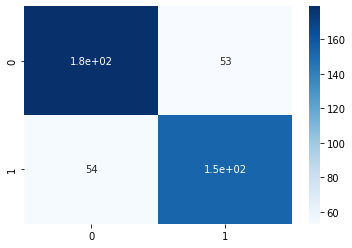

In [ ]:
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test)),
            annot=True, cmap='Blues')

In [ ]:
def plot_roc_curve(fpr, tpr):
  AUCTree = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([-0.01, 1])
  plt.ylim([0, 1.05])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

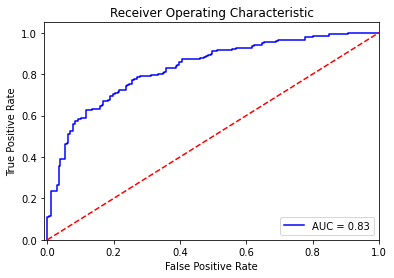

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,0], pos_label=0)
plot_roc_curve(fpr, tpr)

In [ ]:
# Match importance to column by order of appereance
f_importances = classifier.get_feature_importance()
importances = {}
for i in range(0, len(_X.columns)):
  importances[_X.columns[i]] = f_importances[i]

# Overal importance of Topic
topic = 0
topics = [key for key in importances if key.startswith('topic')]
for key in topics:
  topic += importances[key]
  importances.pop(key, None)
importances['topic'] = topic

# Resulting importances
importances

{'headline_avg_subjetivity': 9.559363663541943,
 'headline_especiales': 6.221233212108037,
 'headline_mayusculas': 3.283478757292129,
 'headline_numbers': 4.593462169633238,
 'headline_palabras': 8.265493821361181,
 'headline_palabras_avg_len': 6.117385355421394,
 'headline_stopwords': 5.089566692435664,
 'headline_unicas': 3.886471562059798,
 'text_especiales': 7.148654936030959,
 'text_mayusculas': 1.6936887180119466,
 'text_numbers': 2.2572722008713546,
 'text_oraciones': 12.41866510464669,
 'text_oraciones_avg_len': 7.980920499166259,
 'text_palabras': 0.4700701274649493,
 'text_palabras_avg_len': 5.435389252893336,
 'text_stopwords': 3.687825050641691,
 'text_unicas': 7.239153075733665,
 'topic': 4.651905800685763}

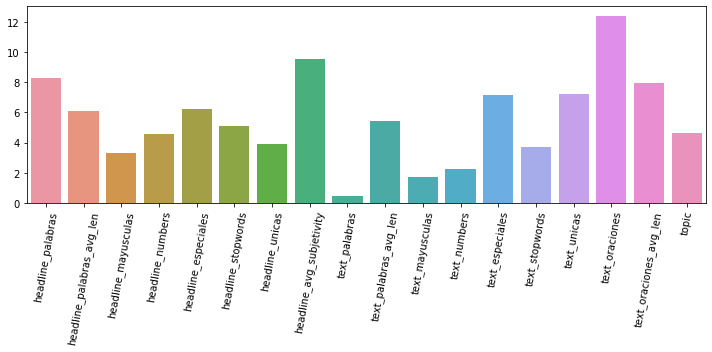

In [ ]:
keys = list(importances.keys())
# get values in the same order as keys, and parse percentage values
vals = [importances[k] for k in keys]
plt.figure(figsize=(10, 5))
sns.barplot(x=keys, y=vals)
plt.xticks(rotation=80)
plt.tight_layout()

### Predicción con LSTM (Red neuronal recurrente)

In [ ]:
%pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

Explorando las fake news

In [ ]:
def remove_stop_words(text):
  _stopwords = set(stopwords.words('spanish'))
  return ' '.join([w for w in text.split() if w not in _stopwords])

def concat_headline_text(row):
  return row['Headline'] + row['Text']

In [ ]:
data_rnn = data_fin.copy()
# data_rnn['text_translate'] = data_rnn['Text'].apply(lambda x: translator.translate(x,src='es').text)
# data_rnn['Topic'] = data_rnn['Topic'].apply(lambda x: translator.translate(x).text)
data_rnn['Headline'] = data_rnn['Headline'].apply(process_string)
# data_rnn['Headline'] = data_rnn['Headline'].apply(remove_stop_words)
data_rnn['Text'] = data_rnn['Text'].apply(process_string)
# data_rnn['Text'] = data_rnn['Text'].apply(remove_stop_words)
# data_rnn['Text'] = data_rnn.apply(concat_headline_text, axis=1)
fake = data_rnn[data_rnn['Category']=='Fake']

In [ ]:
fake.columns

Index(['Category', 'Topic', 'Source', 'Headline', 'Text', 'Link', 'Protocolo'], dtype='object')

In [ ]:
fake['Topic'].value_counts()

Política           201
Sociedad           168
Covid-19           116
Entretenimiento     78
Deportes            57
Ciencia             50
Seguridad           25
Salud               23
Economia            19
Educacion           12
Internacional        7
Ambiental            2
Deporte              1
Name: Topic, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


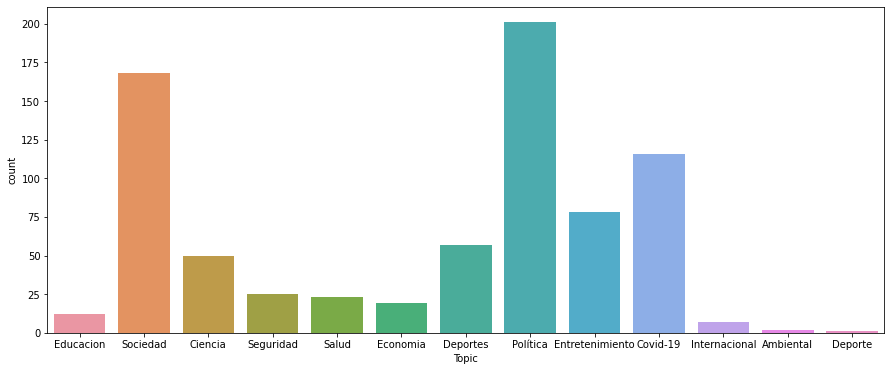

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot('Topic', data=fake)

In [ ]:
text = ' '.join(fake['Text'].tolist())

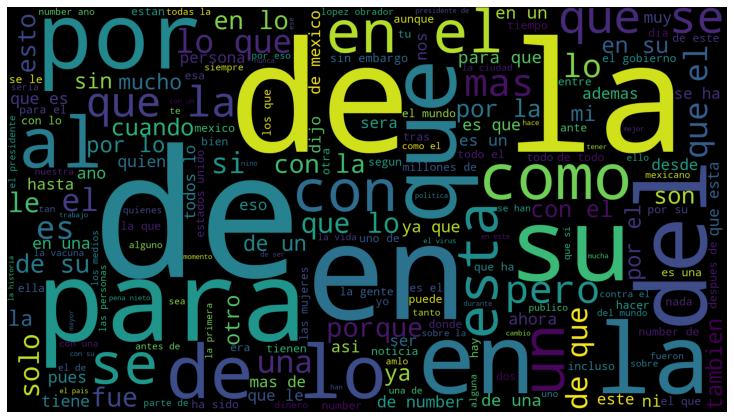

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Limpieza de datos

In [ ]:
data = data_rnn[['Text','Category']].rename(columns={'Text':'text','Category':'class'})
data['class'] = data['class'].apply(lambda x: 0 if x == 'True' else 1)

In [ ]:
data.head()

,text,class
0,maestra de number anos que tuvo relaciones con...,1
1,oxford lanza sus propios examenes de certifica...,0
2,la rae estudia incluir machirulo en el diccion...,0
3,malala yousafzai anuncia que estudiara en oxfo...,0
4,nombran a ricardo arjona nuevo miembro de la r...,1


**Vectorización**

Convertir la data de texto en vectores numéricos

In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
DIM = 80
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

42517

In [ ]:
w2v_model.wv.most_similar('gobierno')

[('estado', 0.9726450443267822),
 ('tlatlaya', 0.9645542502403259),
 ('renuncio', 0.9552909135818481),
 ('referendum', 0.9536020755767822),
 ('aspirante', 0.953544020652771),
 ('ministerio', 0.9526114463806152),
 ('aeropuerto', 0.9521450996398926),
 ('comunicado', 0.9521216750144958),
 ('gabinete', 0.9508646726608276),
 ('santos', 0.9507699012756348)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

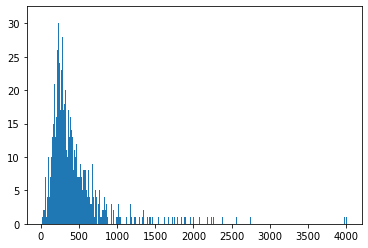

In [ ]:
plt.hist([len(x) for x in X],bins = 700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1200])

61

In [ ]:
maxlen = 1200
X = pad_sequences(X,maxlen=maxlen)

In [ ]:
len(X[100])

1200

In [ ]:
vocab_size = len(tokenizer.word_index)+ 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  
  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(42518, 80)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors],
                    input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1200, 80)          3401440   
                                                                 
 lstm (LSTM)                 (None, 128)               107008    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,508,577
Trainable params: 107,137
Non-trainable params: 3,401,440
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=20, verbose=0)

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.6347826086956522
Recall Score: 0.6622807017543859
Precision Score: 0.6239669421487604
F1-Score: 0.6425531914893616


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       232
           1       0.62      0.66      0.64       228

    accuracy                           0.63       460
   macro avg       0.64      0.64      0.63       460
weighted avg       0.64      0.63      0.63       460



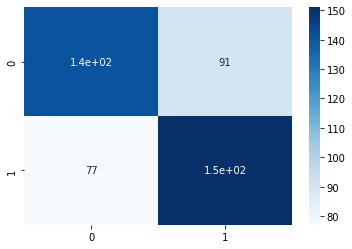

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, cmap='Blues')

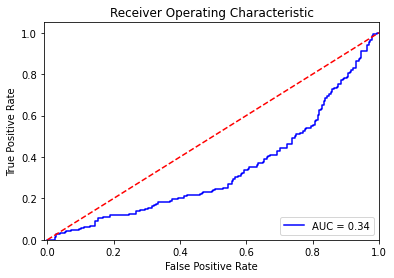

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test), pos_label=0)
plot_roc_curve(fpr, tpr)